# PSTH Heatmap Analysis

This notebook creates heatmaps that combine PSTH data from multiple units.
- **Y-axis**: Units (sorted in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Firing rate (Hz)

## Parameters
Configure the analysis parameters in the cell below and run the analysis.

In [2]:
# Import required modules
import sys
import os
sys.path.append('../..')

from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics
from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility
import matplotlib.pyplot as plt

# Reload module for development
import importlib
if 'heatmap_utils' in sys.modules:
    importlib.reload(sys.modules['heatmap_utils'])
    from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics
if 'digitalin_loader' in sys.modules:
    importlib.reload(sys.modules['digitalin_loader'])
    from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility

In [10]:
# Configuration - Update these paths to match your data location
data_folder = "../../../Data/040425"  # Adjust this path as needed
digitalin_file = os.path.join(data_folder, "digitalin.dat")
spikes_file = os.path.join(data_folder, "spikes.csv")

# Alternative path for Windows (from your example)
# digitalin_file = r"C:\Users\wanglab\Desktop\Club Like Endings\040425_1\digitalin.dat"

# Recording parameters
sampling_rate = 30000  # Hz - adjust if different
pico_channel = 0      # Channel for pico intervals
time_channel = 1      # Channel for time markers

In [11]:
# PSTH Heatmap Analysis Parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms) - can analyze multiple at once
units = None                      # Units to include (None = all units, or specify list like [1, 2, 3])
bin_size_ms = 0.1                 # Bin size in milliseconds
start_time = None                 # Start time for filtering in seconds (optional)
end_time = None                   # End time for filtering in seconds (optional)
max_trials = None                 # Maximum number of trials to include (None = all trials)
pre_interval_ms = 5               # Milliseconds before interval to include
post_interval_ms = 10             # Milliseconds after interval to include
smooth_window = 5                 # Number of bins for smoothing (None for no smoothing)
trial_ranges = None               # Specific trial ranges (None for all/max_trials)
save_plots = False                # Whether to save plots to file
output_path = "../../Output/040425/heatmaps"  # Directory to save plots


--- Processing duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from digitalin.dat: ../../../Data/040425/digitalin.dat
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: ../../../Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24.97ms)
  Event 2: 244.962833s - 244.987800s (24.97ms)
  Event 3: 245.012833s - 245.037833s (25.00ms)
  Event 4: 245.062833s - 245.087833s (25.00ms)
  Event 5: 245.112833s - 245.13

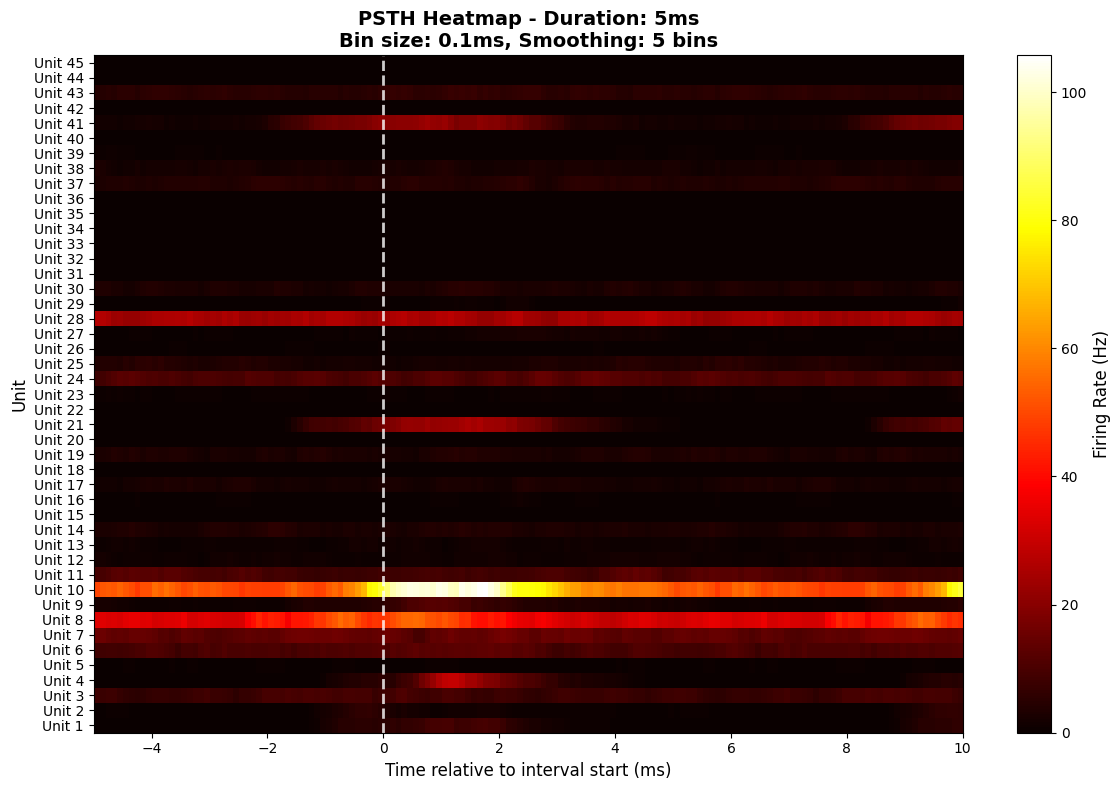

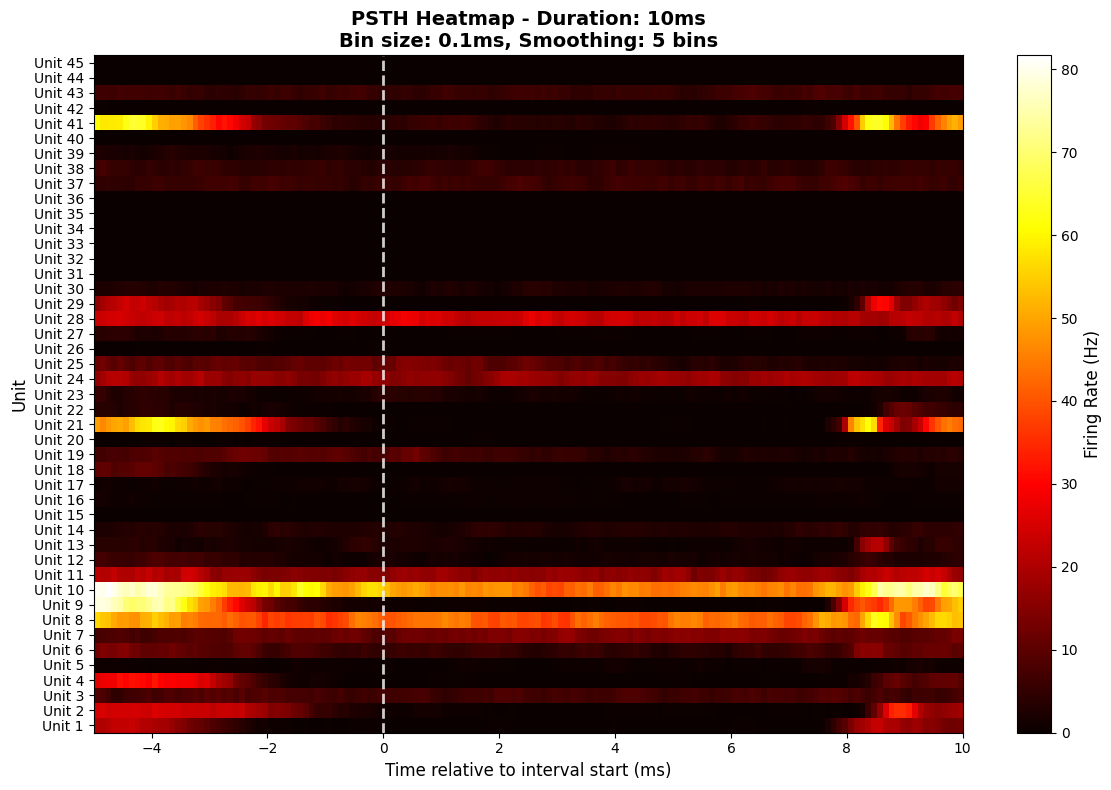

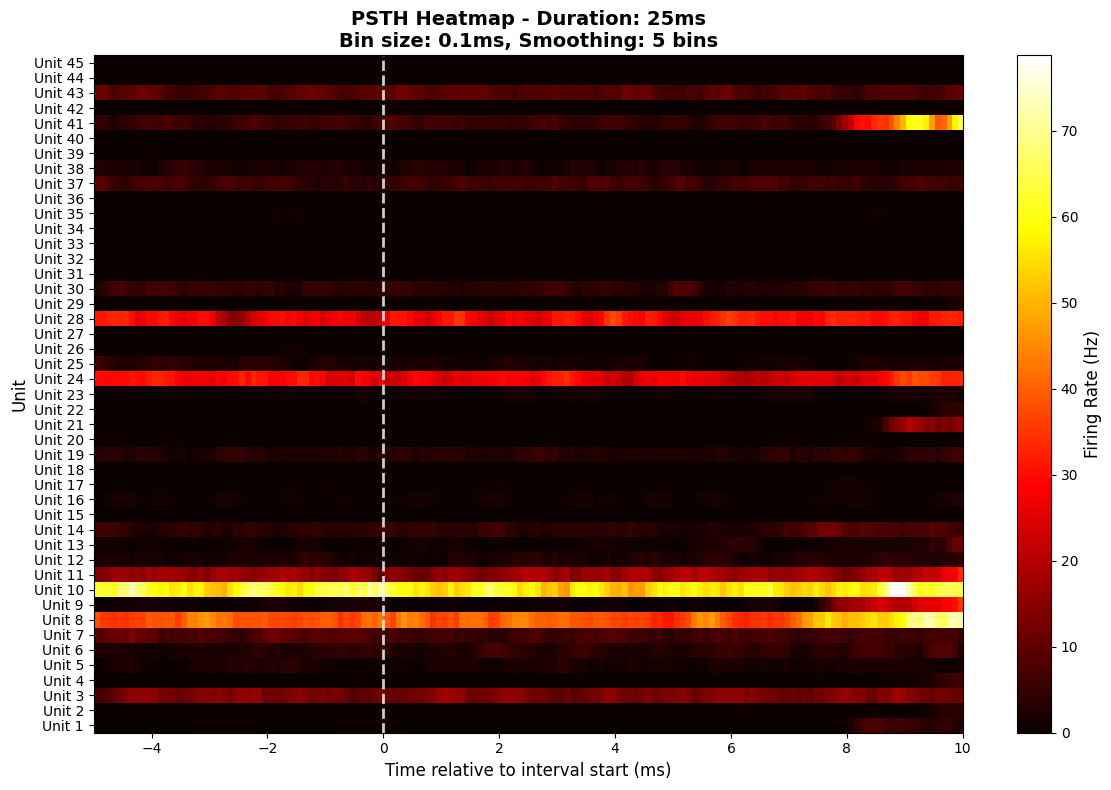

In [12]:
# Run PSTH heatmap analysis with digitalin.dat
results = create_multiple_duration_heatmaps(
    spikes_file=spikes_file,
    digitalin_file=digitalin_file,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    sampling_rate=sampling_rate,
    use_digitalin=True,
    save_dir=output_path if save_plots else None
)

# Display all plots (optional when saving)
if results:
    print(f"\nGenerated {len(results)} heatmaps!")
    if not save_plots:  # Only show plots if not saving (to avoid cluttering)
        for duration, (fig, heatmap_data, units_list, time_bins) in results.items():
            if fig is not None:
                plt.show()
else:
    print("No results generated!")

In [7]:
# Test digitalin.dat loading
if os.path.exists(digitalin_file):
    print("Loading digitalin.dat file...")
    
    try:
        intervals_df = load_digitalin_intervals(
            digitalin_filepath=digitalin_file,
            sampling_rate=sampling_rate,
            pico_channel=pico_channel,
            time_channel=time_channel
        )
        
        print(f"\nSuccessfully loaded {len(intervals_df)} intervals!")
        print("\nFirst few intervals:")
        print(intervals_df.head())
        
        # Validate compatibility
        is_valid = validate_intervals_compatibility(intervals_df)
        print(f"\nCompatibility check: {'✓ PASSED' if is_valid else '✗ FAILED'}")
        
    except Exception as e:
        print(f"Error loading digitalin.dat: {e}")
        intervals_df = None
        
else:
    print("digitalin.dat file not found! Please check the file path.")
    intervals_df = None

Testing digitalin.dat loading...
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: /home/wanglab/spike-analysis/Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24.97ms)
  Event 2: 244.962833s - 244.987800s (24.97ms)
  Event 3: 245.012833s - 245.037833s (25.00ms)
  Event 4: 245.062833s - 245.087833s (25.00ms)
  Event 5: 245.112833s - 245.137833s (25.00ms)

Extracting TTL events from channel 1
Total High TTL Values:  25811067
Total Low TTL Values:  1465989
Events are most l